In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd
plt.style.use('seaborn-whitegrid')

In [2]:
ROOT_PATH = Path().absolute().parent

In [3]:
basic_result_path = ROOT_PATH.joinpath('data', 'processed', 'test_results.csv')
adaptive_result_path = ROOT_PATH.joinpath('data', 'processed', 'adaptive_test_results.csv')

In [4]:
save_path = ROOT_PATH.joinpath('notebooks', 'visuals')

In [5]:
metrics = ['b1', 'b2', 'b3', 'b4', 'm', 'r', 'c', 's']

# Model B

In [6]:
basic_result_df = pd.read_csv(basic_result_path)
basic_result_df

,Unnamed: 0,Unnamed: 0.1,model,dataset,b1,b2,b3,b4,m,r,c,s
0,0.0,0.0,basic_exp_01-May-2020_(05:42:18),c2,0.669058,0.483351,0.338622,0.236642,0.221694,0.486920,0.776404,0.150293
1,1.0,1.0,basic_exp_04-May-2020_(00:24:18),c2,0.665108,0.478739,0.333406,0.231589,0.221035,0.484742,0.766270,0.151792
2,2.0,2.0,basic_exp_05-May-2020_(19:11:32),c2,0.665990,0.480592,0.336438,0.236355,0.220597,0.485415,0.769925,0.149419
3,3.0,3.0,basic_exp_07-May-2020_(07:06:16),c2,0.667149,0.481843,0.337281,0.235881,0.220766,0.485534,0.765396,0.149255
4,4.0,4.0,basic_exp_08-May-2020_(01:12:31),c2,0.664032,0.478852,0.334020,0.232723,0.219495,0.483282,0.768219,0.150245
...,...,...,...,...,...,...,...,...,...,...,...,...
70,NaN,NaN,basic_08-May-2020_(21:46:09),coco,0.671385,0.490180,0.347492,0.246531,0.226543,0.492319,0.813025,0.155251
71,NaN,NaN,basic_08-May-2020_(21:46:13),coco,0.673247,0.491072,0.347602,0.245834,0.226678,0.493376,0.814906,0.157043
72,NaN,NaN,basic_08-May-2020_(22:16:18),coco,0.679351,0.498609,0.354748,0.251195,0.228059,0.495736,0.820980,0.157414
73,NaN,NaN,basic_08-May-2020_(22:32:32),coco,0.671508,0.490471,0.348854,0.248209,0.228085,0.493894,0.814678,0.157045


In [7]:
basic_result_df = basic_result_df.loc[:, ['model', 'dataset'] + metrics]

## Baseline results

In [8]:
b_baseline_df = basic_result_df.loc[basic_result_df.loc[:,'dataset']=='coco', :]
b_baseline_df

,model,dataset,b1,b2,b3,b4,m,r,c,s
70,basic_08-May-2020_(21:46:09),coco,0.671385,0.490180,0.347492,0.246531,0.226543,0.492319,0.813025,0.155251
71,basic_08-May-2020_(21:46:13),coco,0.673247,0.491072,0.347602,0.245834,0.226678,0.493376,0.814906,0.157043
72,basic_08-May-2020_(22:16:18),coco,0.679351,0.498609,0.354748,0.251195,0.228059,0.495736,0.820980,0.157414
73,basic_08-May-2020_(22:32:32),coco,0.671508,0.490471,0.348854,0.248209,0.228085,0.493894,0.814678,0.157045
74,basic_08-May-2020_(23:14:34),coco,0.671619,0.492441,0.350103,0.249072,0.227008,0.493799,0.814147,0.157508


In [9]:
b_baseline_df.describe()

,b1,b2,b3,b4,m,r,c,s
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.673422,0.492555,0.349760,0.248168,0.227275,0.493825,0.815547,0.156852
std,0.003400,0.003494,0.002984,0.002128,0.000747,0.001238,0.003123,0.000920
min,0.671385,0.490180,0.347492,0.245834,0.226543,0.492319,0.813025,0.155251
25%,0.671508,0.490471,0.347602,0.246531,0.226678,0.493376,0.814147,0.157043
50%,0.671619,0.491072,0.348854,0.248209,0.227008,0.493799,0.814678,0.157045
75%,0.673247,0.492441,0.350103,0.249072,0.228059,0.493894,0.814906,0.157414
max,0.679351,0.498609,0.354748,0.251195,0.228085,0.495736,0.820980,0.157508


In [10]:
b_baseline_df.mean().loc['b1']

0.6734220240000001

## Model B experiments result

In [11]:
c1_b_df = basic_result_df.loc[basic_result_df.loc[:,'dataset']=='c1', :]
c2_b_df = basic_result_df.loc[basic_result_df.loc[:,'dataset']=='c2', :]
c3_b_df = basic_result_df.loc[basic_result_df.loc[:,'dataset']=='c3', :]
c4_b_df = basic_result_df.loc[basic_result_df.loc[:,'dataset']=='c4', :]
c5_b_df = basic_result_df.loc[basic_result_df.loc[:,'dataset']=='c5', :]
cp6_b_df = basic_result_df.loc[basic_result_df.loc[:,'dataset']=='cp6', :]
cp7_b_df = basic_result_df.loc[basic_result_df.loc[:,'dataset']=='cp7', :]
cp8_b_df = basic_result_df.loc[basic_result_df.loc[:,'dataset']=='cp8', :]
cp9_b_df = basic_result_df.loc[basic_result_df.loc[:,'dataset']=='cp9', :]
cp10_b_df = basic_result_df.loc[basic_result_df.loc[:,'dataset']=='cp10', :]
c1p1_b_df = basic_result_df.loc[basic_result_df.loc[:,'dataset']=='c1p1', :]
c2p2_b_df = basic_result_df.loc[basic_result_df.loc[:,'dataset']=='c2p2', :]
c3p3_b_df = basic_result_df.loc[basic_result_df.loc[:,'dataset']=='c3p3', :]
c4p4_b_df = basic_result_df.loc[basic_result_df.loc[:,'dataset']=='c4p4', :]

b_c1_c10_dfs = [c1_b_df, c2_b_df, c3_b_df, c4_b_df, c5_b_df, cp6_b_df, cp7_b_df, cp8_b_df, cp9_b_df, cp10_b_df]
b_c1p1_c5p5_dfs = [c1p1_b_df, c2p2_b_df, c3p3_b_df, c4p4_b_df, cp10_b_df]

In [12]:
b1_c1_10 = np.zeros((2,10))
b2_c1_10 = np.zeros((2,10))
b3_c1_10 = np.zeros((2,10))
b4_c1_10 = np.zeros((2,10))
m_c1_10 = np.zeros((2,10))
r_c1_10 = np.zeros((2,10))
c_c1_10 = np.zeros((2,10))
s_c1_10 = np.zeros((2,10))

b_c1_c10_arrs = [b1_c1_10, b2_c1_10, b3_c1_10, b4_c1_10, m_c1_10, r_c1_10, c_c1_10, s_c1_10]

b1_c1p1_c5p5 = np.zeros((2,5))
b2_c1p1_c5p5 = np.zeros((2,5))
b3_c1p1_c5p5 = np.zeros((2,5))
b4_c1p1_c5p5 = np.zeros((2,5))
m_c1p1_c5p5 = np.zeros((2,5))
r_c1p1_c5p5 = np.zeros((2,5))
c_c1p1_c5p5 = np.zeros((2,5))
s_c1p1_c5p5 = np.zeros((2,5))

b_c1p1_c5p5_arrs = [b1_c1p1_c5p5, b2_c1p1_c5p5, b3_c1p1_c5p5, b4_c1p1_c5p5, m_c1p1_c5p5, r_c1p1_c5p5, c_c1p1_c5p5, s_c1p1_c5p5]

In [13]:
# fill the arrays
for i, df in enumerate(b_c1_c10_dfs):
    for arr, metric in zip(b_c1_c10_arrs, metrics):
        arr[0, i] = df.mean().loc[metric]
        arr[1, i] = df.std().loc[metric]
b1_c1_10

array([[0.65225824, 0.66626764, 0.66950883, 0.67011157, 0.67422343,
        0.67716197, 0.68087538, 0.67999472, 0.68266492, 0.68237636],
       [0.00262583, 0.00193547, 0.00230046, 0.00360823, 0.00302499,
        0.00191229, 0.00344552, 0.00119042, 0.00106881, 0.00142414]])

In [14]:
# fill the arrays
for i, df in enumerate(b_c1p1_c5p5_dfs):
    for arr, metric in zip(b_c1p1_c5p5_arrs, metrics):
        arr[0, i] = df.mean().loc[metric]
        arr[1, i] = df.std().loc[metric]
b1_c1p1_c5p5

array([[0.66104459, 0.67453012, 0.67665287, 0.67893072, 0.68237636],
       [0.00242654, 0.00669419, 0.00347697, 0.00297192, 0.00142414]])

In [15]:
x = np.arange(1, 11)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [16]:
METRICS = ['Bleu-1', 'Bleu-2', 'Bleu-3', 'Bleu-4', 'METEOR', 'ROUGE-L', 'CIDEr-D', 'SPICE']

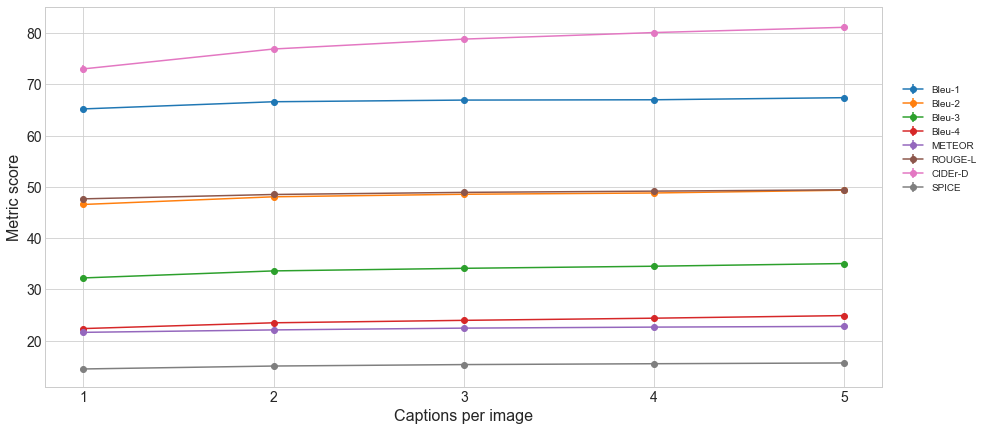

In [56]:
# plot c1-5
plt.figure(figsize=(15,7))
line1 = plt.errorbar(x[:5], b1_c1_10[0][:5]*100, b1_c1_10[1][:5]*100, fmt='-o', label='Bleu-1')
line2 = plt.errorbar(x[:5], b2_c1_10[0][:5]*100, b2_c1_10[1][:5]*100, fmt='-o', label='Bleu-2')
line3 = plt.errorbar(x[:5], b3_c1_10[0][:5]*100, b3_c1_10[1][:5]*100, fmt='-o', label='Bleu-3')
line4 = plt.errorbar(x[:5], b4_c1_10[0][:5]*100, b4_c1_10[1][:5]*100, fmt='-o', label='Bleu-4')
line5 = plt.errorbar(x[:5], m_c1_10[0][:5]*100, m_c1_10[1][:5]*100, fmt='-o', label='METEOR')
line6 = plt.errorbar(x[:5], r_c1_10[0][:5]*100, r_c1_10[1][:5]*100, fmt='-o', label='ROUGE-L')
line7 = plt.errorbar(x[:5], c_c1_10[0][:5]*100, c_c1_10[1][:5]*100, fmt='-o', label='CIDEr-D')
line8 = plt.errorbar(x[:5], s_c1_10[0][:5]*100, s_c1_10[1][:5]*100, fmt='-o', label='SPICE')
#plt.legend([line1, line2, line3, line4, line5, line6, line7, line8], METRICS)
plt.legend(bbox_to_anchor=(1.02, 0.5, 1., .1), loc='lower left',
           ncol=1, borderaxespad=0.)
plt.ylabel('Metric score', Fontsize=16)
plt.xlabel('Captions per image', Fontsize=16)
plt.xticks([1, 2, 3, 4, 5], Fontsize=14)
plt.yticks(Fontsize=14)
plt.savefig(save_path.joinpath('b-c1-5.pdf'))
plt.show()

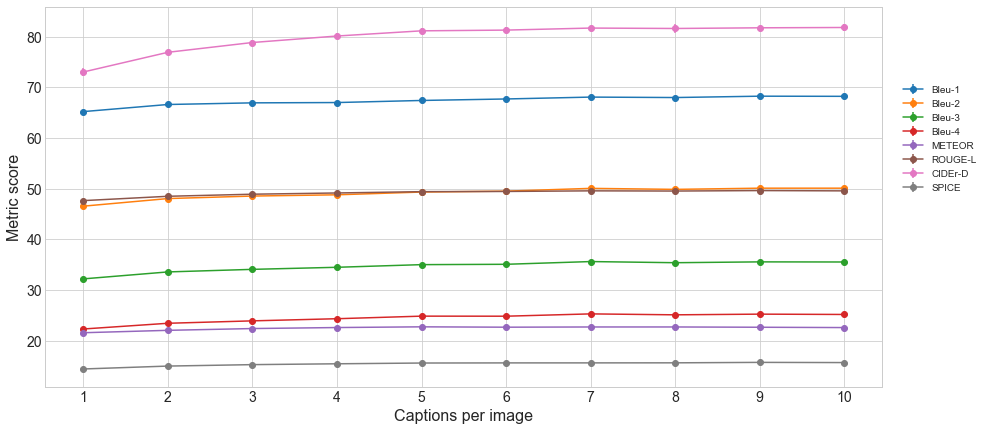

In [55]:
# plot c1-10
plt.figure(figsize=(15,7))
line1 = plt.errorbar(x, b1_c1_10[0]*100, b1_c1_10[1]*100, fmt='-o', label='Bleu-1')
line2 = plt.errorbar(x, b2_c1_10[0]*100, b2_c1_10[1]*100, fmt='-o', label='Bleu-2')
line3 = plt.errorbar(x, b3_c1_10[0]*100, b3_c1_10[1]*100, fmt='-o', label='Bleu-3')
line4 = plt.errorbar(x, b4_c1_10[0]*100, b4_c1_10[1]*100, fmt='-o', label='Bleu-4')
line5 = plt.errorbar(x, m_c1_10[0]*100, m_c1_10[1]*100, fmt='-o', label='METEOR')
line6 = plt.errorbar(x, r_c1_10[0]*100, r_c1_10[1]*100, fmt='-o', label='ROUGE-L')
line7 = plt.errorbar(x, c_c1_10[0]*100, c_c1_10[1]*100, fmt='-o', label='CIDEr-D')
line8 = plt.errorbar(x, s_c1_10[0]*100, s_c1_10[1]*100, fmt='-o', label='SPICE')
#plt.legend([line1, line2, line3, line4, line5, line6, line7, line8], METRICS)
plt.legend(bbox_to_anchor=(1.02, 0.5, 1., .1), loc='lower left',
           ncol=1, borderaxespad=0.)
plt.ylabel('Metric score', Fontsize=16)
plt.xlabel('Captions per image', Fontsize=16)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], Fontsize=14)
plt.yticks(Fontsize=14)
plt.savefig(save_path.joinpath('b-c1-10.pdf'))
plt.show()

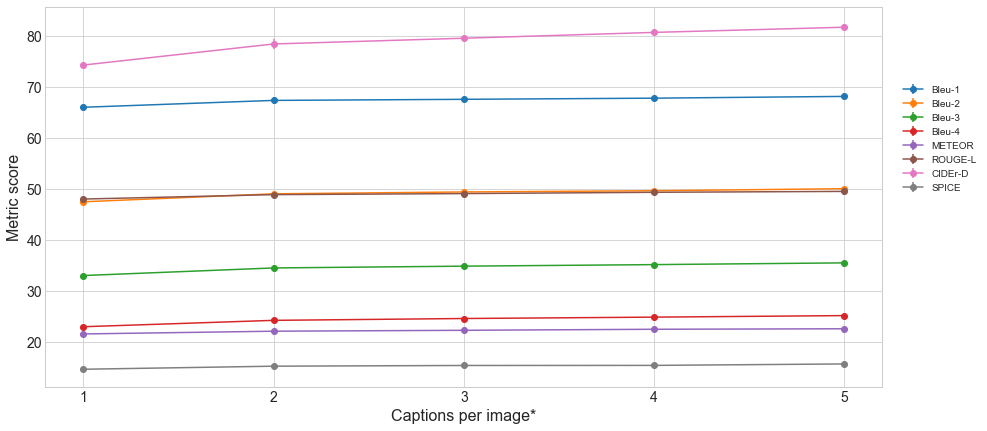

In [60]:
# plot c1p1-c5p5
plt.figure(figsize=(15,7))
line1 = plt.errorbar(x[:5], b1_c1p1_c5p5[0]*100, b1_c1p1_c5p5[1]*100, fmt='-o', label='Bleu-1')
line2 = plt.errorbar(x[:5], b2_c1p1_c5p5[0]*100, b2_c1p1_c5p5[1]*100, fmt='-o', label='Bleu-2')
line3 = plt.errorbar(x[:5], b3_c1p1_c5p5[0]*100, b3_c1p1_c5p5[1]*100, fmt='-o', label='Bleu-3')
line4 = plt.errorbar(x[:5], b4_c1p1_c5p5[0]*100, b4_c1p1_c5p5[1]*100, fmt='-o', label='Bleu-4')
line5 = plt.errorbar(x[:5], m_c1p1_c5p5[0]*100, m_c1p1_c5p5[1]*100, fmt='-o', label='METEOR')
line6 = plt.errorbar(x[:5], r_c1p1_c5p5[0]*100, r_c1p1_c5p5[1]*100, fmt='-o', label='ROUGE-L')
line7 = plt.errorbar(x[:5], c_c1p1_c5p5[0]*100, c_c1p1_c5p5[1]*100, fmt='-o', label='CIDEr-D')
line8 = plt.errorbar(x[:5], s_c1p1_c5p5[0]*100, s_c1p1_c5p5[1]*100, fmt='-o', label='SPICE')
#plt.legend([line1, line2, line3, line4, line5, line6, line7, line8], METRICS)
plt.legend(bbox_to_anchor=(1.02, 0.5, 1., .1), loc='lower left',
           ncol=1, borderaxespad=0.)
plt.ylabel('Metric score', Fontsize=16)
plt.xlabel('Captions per image*', Fontsize=16)
plt.xticks([1, 2, 3, 4, 5], Fontsize=14)
plt.yticks(Fontsize=14)
plt.savefig(save_path.joinpath('b-c1p1-c5p5.pdf'))
plt.show()

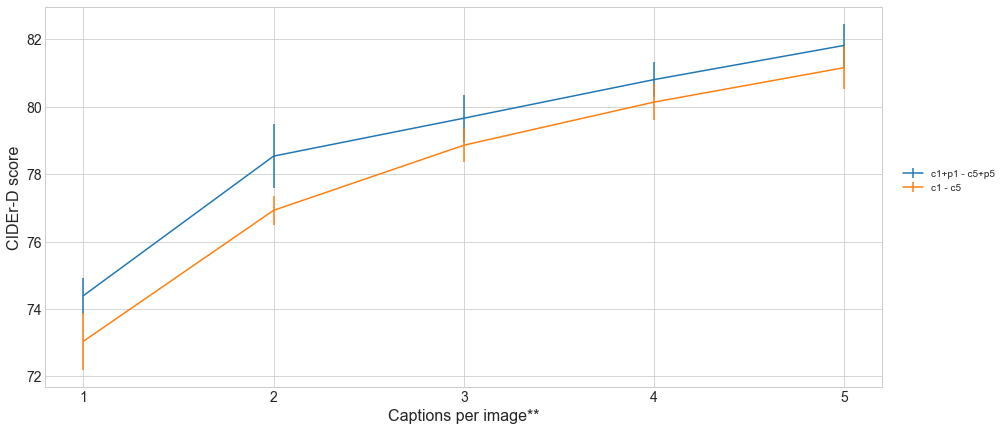

In [61]:
# CIDEr c1-5 vs CIDEr c1p1-c5p5
plt.figure(figsize=(15,7))
line1 = plt.errorbar(x[:5], c_c1p1_c5p5[0]*100, c_c1p1_c5p5[1]*100, fmt='-', label='c1+p1 - c5+p5')
line2 = plt.errorbar(x[:5], c_c1_10[0][:5]*100, c_c1_10[1][:5]*100, fmt='-', label='c1 - c5')
plt.legend(bbox_to_anchor=(1.02, 0.5, 1., .1), loc='lower left',
           ncol=1, borderaxespad=0.)
plt.ylabel('CIDEr-D score', Fontsize=16)
plt.xlabel('Captions per image**', Fontsize=16)
plt.xticks([1, 2, 3, 4, 5], Fontsize=14)
plt.yticks(Fontsize=14)
plt.savefig(save_path.joinpath('cider_b_c1-5_vs_c1p1-c5p5.pdf'))
plt.show()

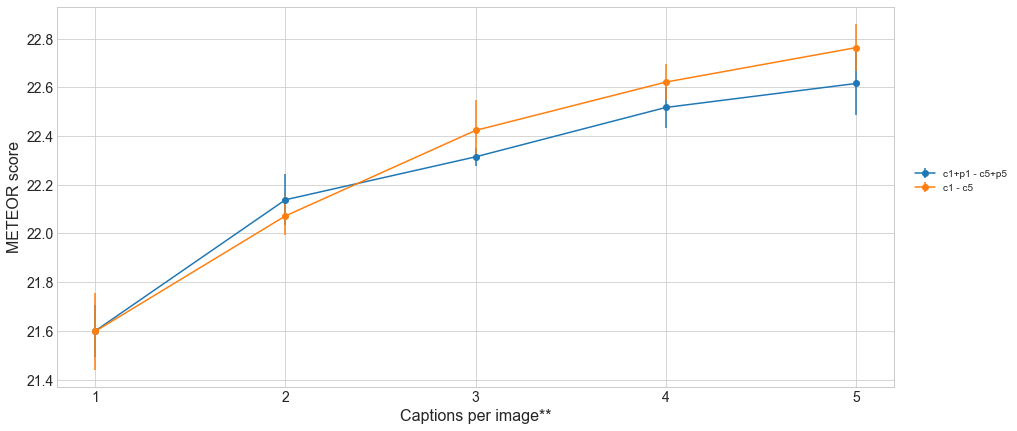

In [62]:
# METEOR
plt.figure(figsize=(15,7))
line1 = plt.errorbar(x[:5], m_c1p1_c5p5[0]*100, m_c1p1_c5p5[1]*100, fmt='-o', label='c1+p1 - c5+p5')
line2 = plt.errorbar(x[:5], m_c1_10[0][:5]*100, m_c1_10[1][:5]*100, fmt='-o', label='c1 - c5')
plt.legend(bbox_to_anchor=(1.02, 0.5, 1., .1), loc='lower left',
           ncol=1, borderaxespad=0.)
plt.ylabel('METEOR score', Fontsize=16)
plt.xlabel('Captions per image**', Fontsize=16)
plt.xticks([1, 2, 3, 4, 5], Fontsize=14)
plt.yticks(Fontsize=14)
plt.savefig(save_path.joinpath('meteor_b_c1-5_vs_c1p1-c5p5.pdf'))
plt.show()


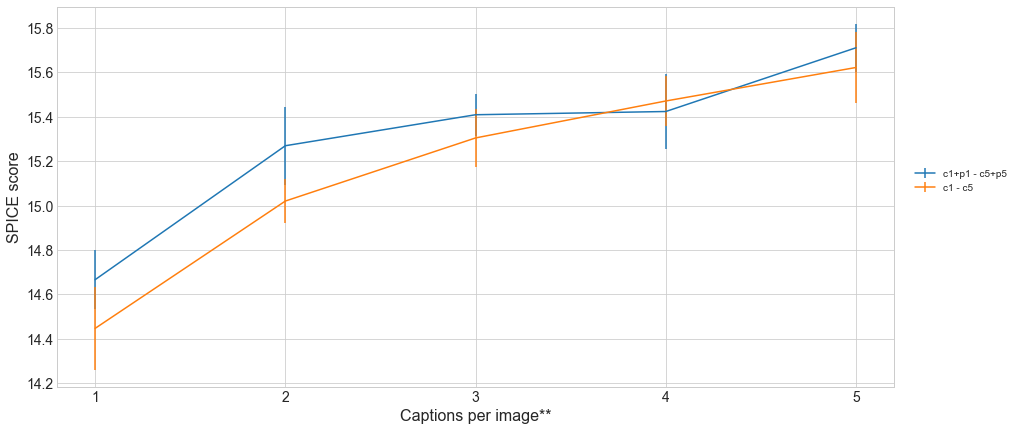

In [63]:
# SPICE
plt.figure(figsize=(15,7))
line1 = plt.errorbar(x[:5], s_c1p1_c5p5[0]*100, s_c1p1_c5p5[1]*100, fmt='-', label='c1+p1 - c5+p5')
line2 = plt.errorbar(x[:5], s_c1_10[0][:5]*100, s_c1_10[1][:5]*100, fmt='-', label='c1 - c5')
plt.legend(bbox_to_anchor=(1.02, 0.5, 1., .1), loc='lower left',
           ncol=1, borderaxespad=0.)
plt.ylabel('SPICE score', Fontsize=16)
plt.xlabel('Captions per image**', Fontsize=16)
plt.xticks([1, 2, 3, 4, 5], Fontsize=14)
plt.yticks(Fontsize=14)
plt.savefig(save_path.joinpath('spice_b_c1-5_vs_c1p1-c5p5.pdf'))
plt.show()

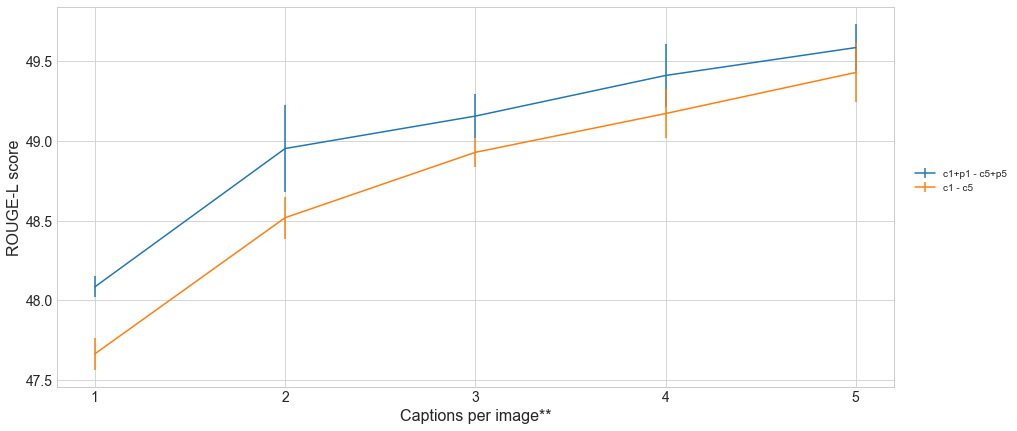

In [64]:
# ROUGE-L
plt.figure(figsize=(15,7))
line1 = plt.errorbar(x[:5], r_c1p1_c5p5[0]*100, r_c1p1_c5p5[1]*100, fmt='-', label='c1+p1 - c5+p5')
line2 = plt.errorbar(x[:5], r_c1_10[0][:5]*100, r_c1_10[1][:5]*100, fmt='-', label='c1 - c5')
plt.legend(bbox_to_anchor=(1.02, 0.5, 1., .1), loc='lower left',
           ncol=1, borderaxespad=0.)
plt.ylabel('ROUGE-L score', Fontsize=16)
plt.xlabel('Captions per image**', Fontsize=16)
plt.xticks([1, 2, 3, 4, 5], Fontsize=14)
plt.yticks(Fontsize=14)
plt.savefig(save_path.joinpath('rougel_b_c1-5_vs_c1p1-c5p5.pdf'))
plt.show()

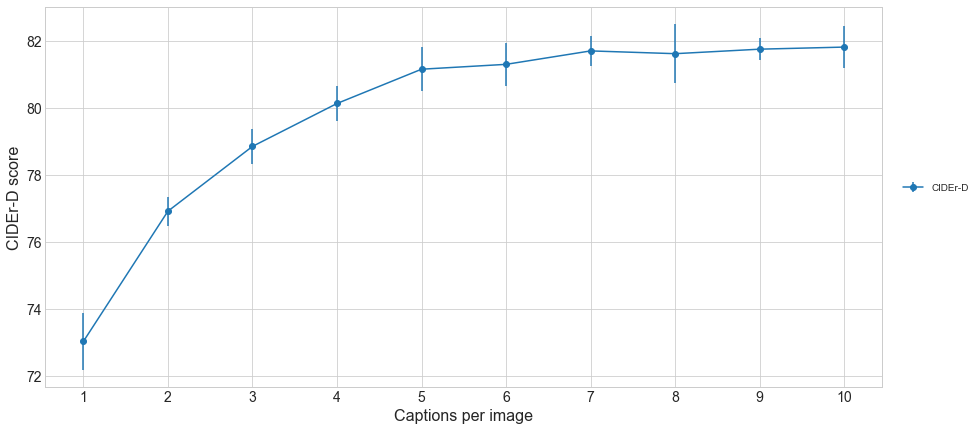

In [24]:
# plot c1-10
plt.figure(figsize=(15,7))
line7 = plt.errorbar(x, c_c1_10[0]*100, c_c1_10[1]*100, fmt='-o', label='CIDEr-D')
#plt.legend([line1, line2, line3, line4, line5, line6, line7, line8], METRICS)
plt.legend(bbox_to_anchor=(1.02, 0.5, 1., .1), loc='lower left',
           ncol=1, borderaxespad=0.)
plt.ylabel('CIDEr-D score', Fontsize=16)
plt.xlabel('Captions per image', Fontsize=16)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], Fontsize=14)
plt.yticks(Fontsize=14)
plt.savefig(save_path.joinpath('b-cider-c1-10.pdf'))
plt.show()

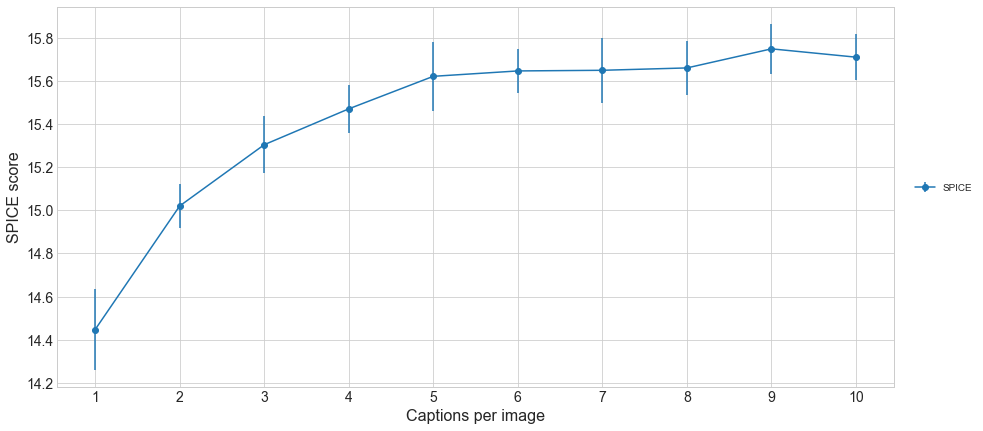

In [45]:
# plot c1-10
plt.figure(figsize=(15,7))
line7 = plt.errorbar(x, s_c1_10[0]*100, s_c1_10[1]*100, fmt='-o', label='SPICE')
#plt.legend([line1, line2, line3, line4, line5, line6, line7, line8], METRICS)
plt.legend(bbox_to_anchor=(1.02, 0.5, 1., .1), loc='lower left',
           ncol=1, borderaxespad=0.)
plt.ylabel('SPICE score', Fontsize=16)
plt.xlabel('Captions per image', Fontsize=16)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], Fontsize=14)
plt.yticks(Fontsize=14)
plt.savefig(save_path.joinpath('b-spice-c1-10.pdf'))
plt.show()

# Model A

In [25]:
a_df = pd.read_csv(adaptive_result_path)
a_df

,model,dataset,b1,b2,b3,b4,m,r,c,s
0,adaptive_11-May-2020_(17:29:25),coco,0.704346,0.528105,0.381716,0.273216,0.242518,0.516565,0.910984,0.172740
1,adaptive_11-May-2020_(17:30:25),coco,0.702159,0.525095,0.379197,0.272236,0.242456,0.515321,0.905661,0.172364
2,adaptive_11-May-2020_(17:31:13),coco,0.702556,0.526314,0.381280,0.274083,0.242082,0.513603,0.906488,0.171673
3,adaptive_11-May-2020_(17:33:25),coco,0.698966,0.522683,0.377750,0.271176,0.242662,0.514625,0.906243,0.173259
4,adaptive_11-May-2020_(17:34:25),coco,0.702802,0.525236,0.378726,0.271104,0.241245,0.513937,0.901423,0.171651
...,...,...,...,...,...,...,...,...,...,...
70,adaptive_exp_19-May-2020_(04:45:31),c3p3,0.705490,0.530189,0.382458,0.273646,0.239933,0.514385,0.897424,0.169665
71,adaptive_exp_20-May-2020_(08:29:51),c3p3,0.703551,0.526617,0.377852,0.268371,0.239540,0.513287,0.896542,0.171147
72,adaptive_exp_19-May-2020_(05:06:12),c4p4,0.704637,0.528516,0.382751,0.275510,0.241888,0.514757,0.908164,0.173670
73,adaptive_exp_20-May-2020_(10:00:26),c4p4,0.705222,0.530237,0.383882,0.275012,0.241069,0.515414,0.905986,0.174331


In [26]:
a_baseline_df = a_df.loc[a_df.loc[:,'dataset']=='coco', :]
a_baseline_df

,model,dataset,b1,b2,b3,b4,m,r,c,s
0,adaptive_11-May-2020_(17:29:25),coco,0.704346,0.528105,0.381716,0.273216,0.242518,0.516565,0.910984,0.172740
1,adaptive_11-May-2020_(17:30:25),coco,0.702159,0.525095,0.379197,0.272236,0.242456,0.515321,0.905661,0.172364
2,adaptive_11-May-2020_(17:31:13),coco,0.702556,0.526314,0.381280,0.274083,0.242082,0.513603,0.906488,0.171673
3,adaptive_11-May-2020_(17:33:25),coco,0.698966,0.522683,0.377750,0.271176,0.242662,0.514625,0.906243,0.173259
4,adaptive_11-May-2020_(17:34:25),coco,0.702802,0.525236,0.378726,0.271104,0.241245,0.513937,0.901423,0.171651


In [27]:
a_baseline_df.describe()

,b1,b2,b3,b4,m,r,c,s
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.702166,0.525487,0.379734,0.272363,0.242193,0.514810,0.906160,0.172337
std,0.001972,0.001976,0.001700,0.001294,0.000572,0.001183,0.003394,0.000693
min,0.698966,0.522683,0.377750,0.271104,0.241245,0.513603,0.901423,0.171651
25%,0.702159,0.525095,0.378726,0.271176,0.242082,0.513937,0.905661,0.171673
50%,0.702556,0.525236,0.379197,0.272236,0.242456,0.514625,0.906243,0.172364
75%,0.702802,0.526314,0.381280,0.273216,0.242518,0.515321,0.906488,0.172740
max,0.704346,0.528105,0.381716,0.274083,0.242662,0.516565,0.910984,0.173259


In [28]:
c1_a_df = a_df.loc[a_df.loc[:,'dataset']=='c1', :]
c2_a_df = a_df.loc[a_df.loc[:,'dataset']=='c2', :]
c3_a_df = a_df.loc[a_df.loc[:,'dataset']=='c3', :]
c4_a_df = a_df.loc[a_df.loc[:,'dataset']=='c4', :]
c5_a_df = a_df.loc[a_df.loc[:,'dataset']=='c5', :]
cp6_a_df = a_df.loc[a_df.loc[:,'dataset']=='cp6', :]
cp7_a_df = a_df.loc[a_df.loc[:,'dataset']=='cp7', :]
cp8_a_df = a_df.loc[a_df.loc[:,'dataset']=='cp8', :]
cp9_a_df = a_df.loc[a_df.loc[:,'dataset']=='cp9', :]
cp10_a_df = a_df.loc[a_df.loc[:,'dataset']=='cp10', :]
c1p1_a_df = a_df.loc[a_df.loc[:,'dataset']=='c1p1', :]
c2p2_a_df = a_df.loc[a_df.loc[:,'dataset']=='c2p2', :]
c3p3_a_df = a_df.loc[a_df.loc[:,'dataset']=='c3p3', :]
c4p4_a_df = a_df.loc[a_df.loc[:,'dataset']=='c4p4', :]

a_c1_c10_dfs = [c1_a_df, c2_a_df, c3_a_df, c4_a_df, c5_a_df, cp6_a_df, cp7_a_df, cp8_a_df, cp9_a_df, cp10_a_df]
a_c1p1_c5p5_dfs = [c1p1_a_df, c2p2_a_df, c3p3_a_df, c4p4_a_df, cp10_a_df]

In [29]:
a_b1_c1_10 = np.zeros((2,10))
a_b2_c1_10 = np.zeros((2,10))
a_b3_c1_10 = np.zeros((2,10))
a_b4_c1_10 = np.zeros((2,10))
a_m_c1_10 = np.zeros((2,10))
a_r_c1_10 = np.zeros((2,10))
a_c_c1_10 = np.zeros((2,10))
a_s_c1_10 = np.zeros((2,10))

a_c1_c10_arrs = [a_b1_c1_10, a_b2_c1_10, a_b3_c1_10, a_b4_c1_10, a_m_c1_10, a_r_c1_10, a_c_c1_10, a_s_c1_10]

a_b1_c1p1_c5p5 = np.zeros((2,5))
a_b2_c1p1_c5p5 = np.zeros((2,5))
a_b3_c1p1_c5p5 = np.zeros((2,5))
a_b4_c1p1_c5p5 = np.zeros((2,5))
a_m_c1p1_c5p5 = np.zeros((2,5))
a_r_c1p1_c5p5 = np.zeros((2,5))
a_c_c1p1_c5p5 = np.zeros((2,5))
a_s_c1p1_c5p5 = np.zeros((2,5))

a_c1p1_c5p5_arrs = [a_b1_c1p1_c5p5, a_b2_c1p1_c5p5, a_b3_c1p1_c5p5, a_b4_c1p1_c5p5, a_m_c1p1_c5p5, a_r_c1p1_c5p5, a_c_c1p1_c5p5, a_s_c1p1_c5p5]

In [30]:
# fill the arrays
for i, df in enumerate(a_c1_c10_dfs):
    for arr, metric in zip(a_c1_c10_arrs, metrics):
        arr[0, i] = df.mean().loc[metric]
        arr[1, i] = df.std().loc[metric]
b1_c1_10

array([[0.65225824, 0.66626764, 0.66950883, 0.67011157, 0.67422343,
        0.67716197, 0.68087538, 0.67999472, 0.68266492, 0.68237636],
       [0.00262583, 0.00193547, 0.00230046, 0.00360823, 0.00302499,
        0.00191229, 0.00344552, 0.00119042, 0.00106881, 0.00142414]])

In [31]:
# fill the arrays
for i, df in enumerate(a_c1p1_c5p5_dfs):
    for arr, metric in zip(a_c1p1_c5p5_arrs, metrics):
        arr[0, i] = df.mean().loc[metric]
        arr[1, i] = df.std().loc[metric]
b1_c1p1_c5p5

array([[0.66104459, 0.67453012, 0.67665287, 0.67893072, 0.68237636],
       [0.00242654, 0.00669419, 0.00347697, 0.00297192, 0.00142414]])

In [32]:
x = np.arange(1, 11)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

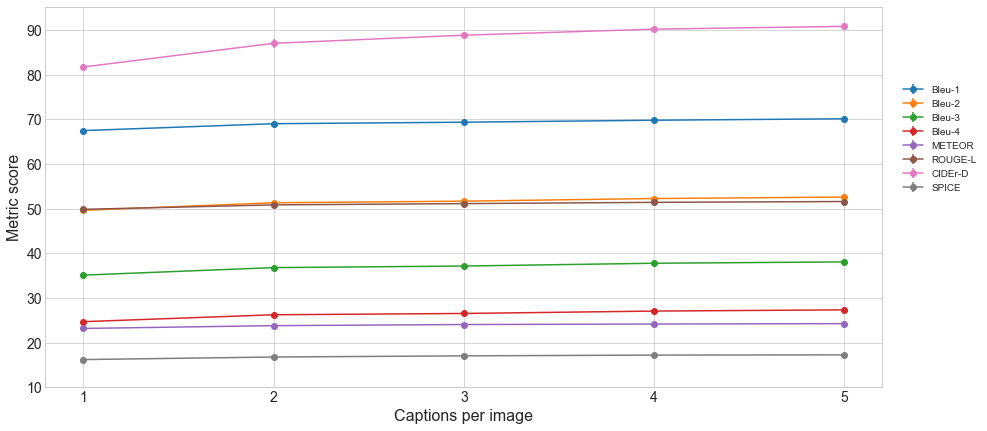

In [33]:
# plot c1-5
plt.figure(figsize=(15,7))
line1 = plt.errorbar(x[:5], a_b1_c1_10[0][:5]*100, a_b1_c1_10[1][:5]*100, fmt='-o', label='Bleu-1')
line2 = plt.errorbar(x[:5], a_b2_c1_10[0][:5]*100, a_b2_c1_10[1][:5]*100, fmt='-o', label='Bleu-2')
line3 = plt.errorbar(x[:5], a_b3_c1_10[0][:5]*100, a_b3_c1_10[1][:5]*100, fmt='-o', label='Bleu-3')
line4 = plt.errorbar(x[:5], a_b4_c1_10[0][:5]*100, a_b4_c1_10[1][:5]*100, fmt='-o', label='Bleu-4')
line5 = plt.errorbar(x[:5], a_m_c1_10[0][:5]*100, a_m_c1_10[1][:5]*100, fmt='-o', label='METEOR')
line6 = plt.errorbar(x[:5], a_r_c1_10[0][:5]*100, a_r_c1_10[1][:5]*100, fmt='-o', label='ROUGE-L')
line7 = plt.errorbar(x[:5], a_c_c1_10[0][:5]*100, a_c_c1_10[1][:5]*100, fmt='-o', label='CIDEr-D')
line8 = plt.errorbar(x[:5], a_s_c1_10[0][:5]*100, a_s_c1_10[1][:5]*100, fmt='-o', label='SPICE')
#plt.legend([line1, line2, line3, line4, line5, line6, line7, line8], METRICS)
plt.legend(bbox_to_anchor=(1.02, 0.5, 1., .1), loc='lower left',
           ncol=1, borderaxespad=0.)
plt.ylabel('Metric score', Fontsize=16)
plt.xlabel('Captions per image', Fontsize=16)
plt.xticks([1, 2, 3, 4, 5], Fontsize=14)
plt.yticks([i for i in range(10, 91, 10)], Fontsize=14)
plt.savefig(save_path.joinpath('a-c1-5.pdf'))
plt.show()

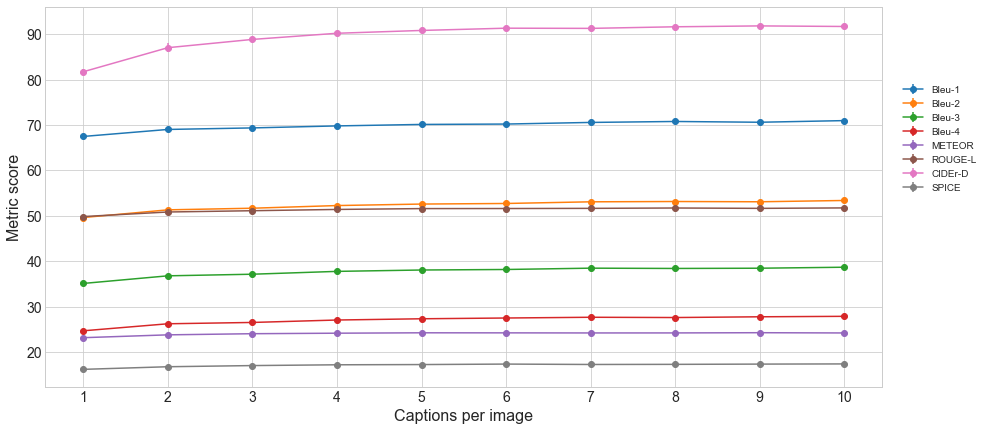

In [65]:
# plot c1-10
plt.figure(figsize=(15,7))
line1 = plt.errorbar(x, a_b1_c1_10[0]*100, a_b1_c1_10[1]*100, fmt='-o', label='Bleu-1')
line2 = plt.errorbar(x, a_b2_c1_10[0]*100, a_b2_c1_10[1]*100, fmt='-o', label='Bleu-2')
line3 = plt.errorbar(x, a_b3_c1_10[0]*100, a_b3_c1_10[1]*100, fmt='-o', label='Bleu-3')
line4 = plt.errorbar(x, a_b4_c1_10[0]*100, a_b4_c1_10[1]*100, fmt='-o', label='Bleu-4')
line5 = plt.errorbar(x, a_m_c1_10[0]*100, a_m_c1_10[1]*100, fmt='-o', label='METEOR')
line6 = plt.errorbar(x, a_r_c1_10[0]*100, a_r_c1_10[1]*100, fmt='-o', label='ROUGE-L')
line7 = plt.errorbar(x, a_c_c1_10[0]*100, a_c_c1_10[1]*100, fmt='-o', label='CIDEr-D')
line8 = plt.errorbar(x, a_s_c1_10[0]*100, a_s_c1_10[1]*100, fmt='-o', label='SPICE')
#plt.legend([line1, line2, line3, line4, line5, line6, line7, line8], METRICS)
plt.legend(bbox_to_anchor=(1.02, 0.5, 1., .1), loc='lower left',
           ncol=1, borderaxespad=0.)
plt.ylabel('Metric score', Fontsize=16)
plt.xlabel('Captions per image', Fontsize=16)
plt.xticks([1, 2,3,4,5,6,7,8,9,10], Fontsize=14)
plt.yticks(Fontsize=14)
plt.savefig(save_path.joinpath('a-c1-10.pdf'))
plt.show()

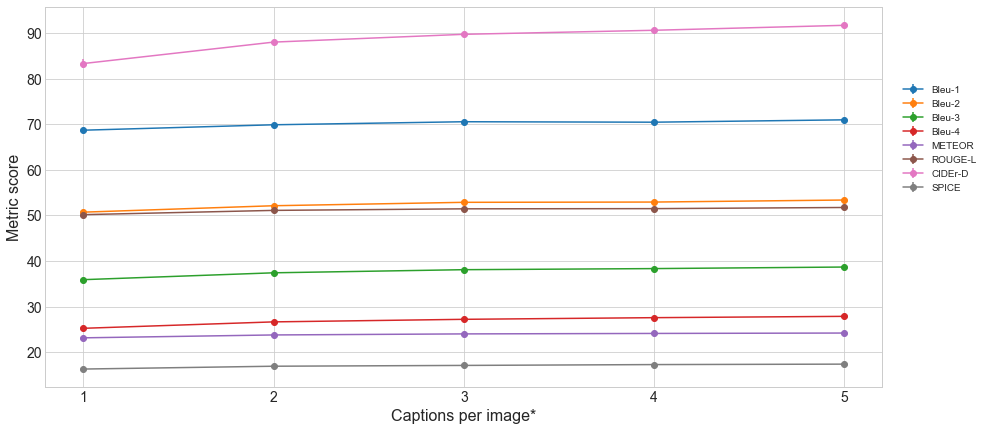

In [66]:
# plot c1p1-c5p5
plt.figure(figsize=(15,7))
line1 = plt.errorbar(x[:5], a_b1_c1p1_c5p5[0]*100, a_b1_c1p1_c5p5[1]*100, fmt='-o', label='Bleu-1')
line2 = plt.errorbar(x[:5], a_b2_c1p1_c5p5[0]*100, a_b2_c1p1_c5p5[1]*100, fmt='-o', label='Bleu-2')
line3 = plt.errorbar(x[:5], a_b3_c1p1_c5p5[0]*100, a_b3_c1p1_c5p5[1]*100, fmt='-o', label='Bleu-3')
line4 = plt.errorbar(x[:5], a_b4_c1p1_c5p5[0]*100, a_b4_c1p1_c5p5[1]*100, fmt='-o', label='Bleu-4')
line5 = plt.errorbar(x[:5], a_m_c1p1_c5p5[0]*100, a_m_c1p1_c5p5[1]*100, fmt='-o', label='METEOR')
line6 = plt.errorbar(x[:5], a_r_c1p1_c5p5[0]*100, a_r_c1p1_c5p5[1]*100, fmt='-o', label='ROUGE-L')
line7 = plt.errorbar(x[:5], a_c_c1p1_c5p5[0]*100, a_c_c1p1_c5p5[1]*100, fmt='-o', label='CIDEr-D')
line8 = plt.errorbar(x[:5], a_s_c1p1_c5p5[0]*100, a_s_c1p1_c5p5[1]*100, fmt='-o', label='SPICE')
#plt.legend([line1, line2, line3, line4, line5, line6, line7, line8], METRICS)
plt.legend(bbox_to_anchor=(1.02, 0.5, 1., .1), loc='lower left',
           ncol=1, borderaxespad=0.)
plt.ylabel('Metric score', Fontsize=16)
plt.xlabel('Captions per image*', Fontsize=16)
plt.xticks([1, 2, 3, 4, 5], Fontsize=14)
plt.yticks(Fontsize=14)
plt.savefig(save_path.joinpath('a-c1p1-c5p5.pdf'))
plt.show()

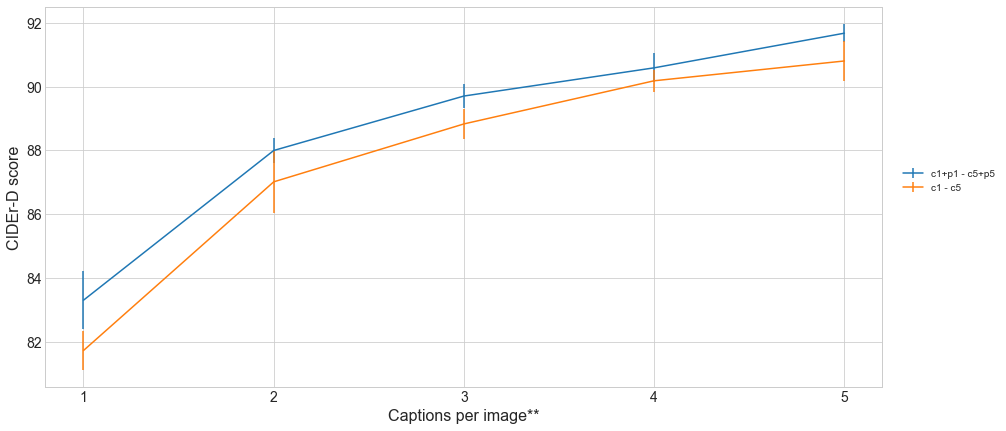

In [67]:
# CIDEr c1-5 vs CIDEr c1p1-c5p5
plt.figure(figsize=(15,7))
line1 = plt.errorbar(x[:5], a_c_c1p1_c5p5[0]*100, a_c_c1p1_c5p5[1]*100, fmt='-', label='c1+p1 - c5+p5')
line2 = plt.errorbar(x[:5], a_c_c1_10[0][:5]*100, a_c_c1_10[1][:5]*100, fmt='-', label='c1 - c5')
plt.legend(bbox_to_anchor=(1.02, 0.5, 1., .1), loc='lower left',
           ncol=1, borderaxespad=0.)
plt.ylabel('CIDEr-D score', Fontsize=16)
plt.xlabel('Captions per image**', Fontsize=16)
plt.xticks([1, 2, 3, 4, 5], Fontsize=14)
plt.yticks(Fontsize=14)
plt.savefig(save_path.joinpath('cider_a_c1-5_vs_c1p1-c5p5.pdf'))
plt.show()

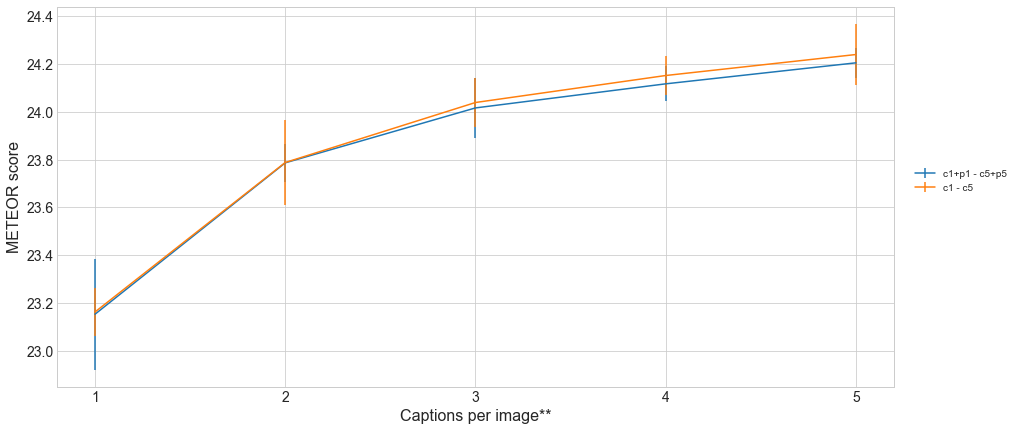

In [68]:
# METEOR c1-5 vs CIDEr c1p1-c5p5
plt.figure(figsize=(15,7))
line1 = plt.errorbar(x[:5], a_m_c1p1_c5p5[0]*100, a_m_c1p1_c5p5[1]*100, fmt='-', label='c1+p1 - c5+p5')
line2 = plt.errorbar(x[:5], a_m_c1_10[0][:5]*100, a_m_c1_10[1][:5]*100, fmt='-', label='c1 - c5')
plt.legend(bbox_to_anchor=(1.02, 0.5, 1., .1), loc='lower left',
           ncol=1, borderaxespad=0.)
plt.ylabel('METEOR score', Fontsize=16)
plt.xlabel('Captions per image**', Fontsize=16)
plt.xticks([1, 2, 3, 4, 5], Fontsize=14)
plt.yticks(Fontsize=14)
plt.savefig(save_path.joinpath('meteor_a_c1-5_vs_c1p1-c5p5.pdf'))
plt.show()

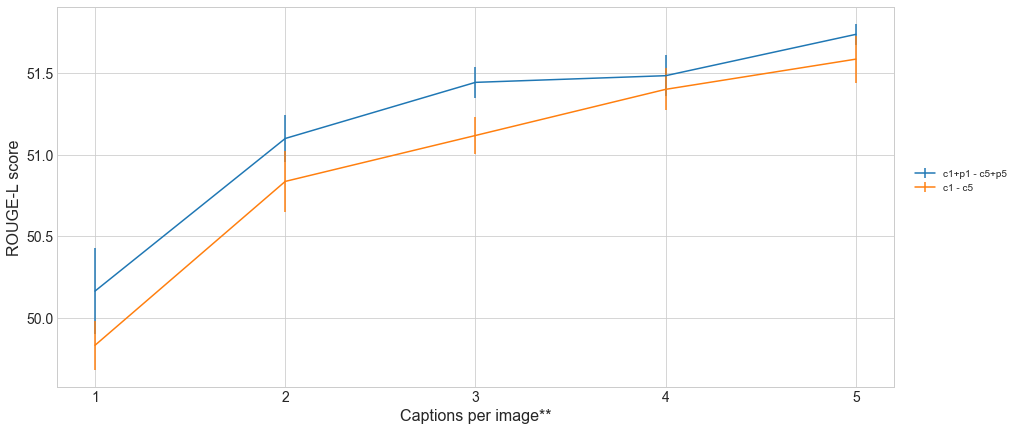

In [69]:
# CIDEr c1-5 vs CIDEr c1p1-c5p5
plt.figure(figsize=(15,7))
line1 = plt.errorbar(x[:5], a_r_c1p1_c5p5[0]*100, a_r_c1p1_c5p5[1]*100, fmt='-', label='c1+p1 - c5+p5')
line2 = plt.errorbar(x[:5], a_r_c1_10[0][:5]*100, a_r_c1_10[1][:5]*100, fmt='-', label='c1 - c5')
plt.legend(bbox_to_anchor=(1.02, 0.5, 1., .1), loc='lower left',
           ncol=1, borderaxespad=0.)
plt.ylabel('ROUGE-L score', Fontsize=16)
plt.xlabel('Captions per image**', Fontsize=16)
plt.xticks([1, 2, 3, 4, 5], Fontsize=14)
plt.yticks(Fontsize=14)
plt.savefig(save_path.joinpath('rouge_a_c1-5_vs_c1p1-c5p5.pdf'))
plt.show()

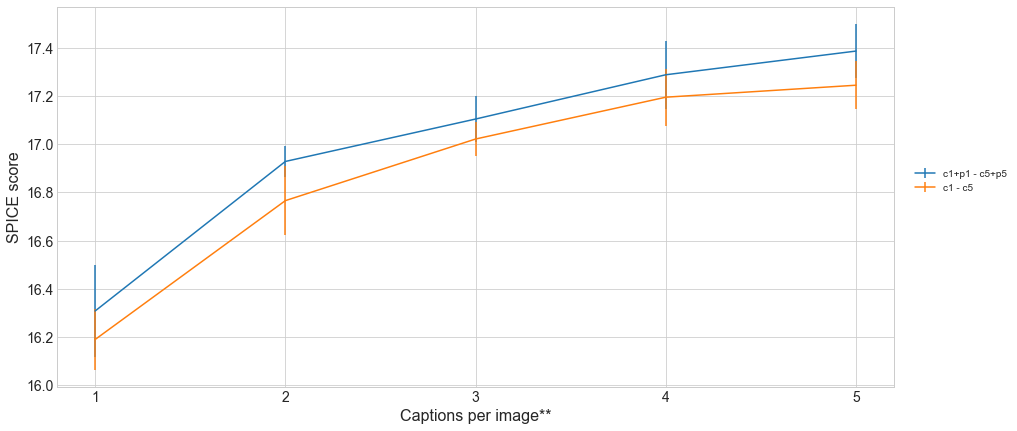

In [70]:
# SPICE c1-5 vs CIDEr c1p1-c5p5
plt.figure(figsize=(15,7))
line1 = plt.errorbar(x[:5], a_s_c1p1_c5p5[0]*100, a_s_c1p1_c5p5[1]*100, fmt='-', label='c1+p1 - c5+p5')
line2 = plt.errorbar(x[:5], a_s_c1_10[0][:5]*100, a_s_c1_10[1][:5]*100, fmt='-', label='c1 - c5')
plt.legend(bbox_to_anchor=(1.02, 0.5, 1., .1), loc='lower left',
           ncol=1, borderaxespad=0.)
plt.ylabel('SPICE score', Fontsize=16)
plt.xlabel('Captions per image**', Fontsize=16)
plt.xticks([1, 2, 3, 4, 5], Fontsize=14)
plt.yticks(Fontsize=14)
plt.savefig(save_path.joinpath('spice_a_c1-5_vs_c1p1-c5p5.pdf'))
plt.show()

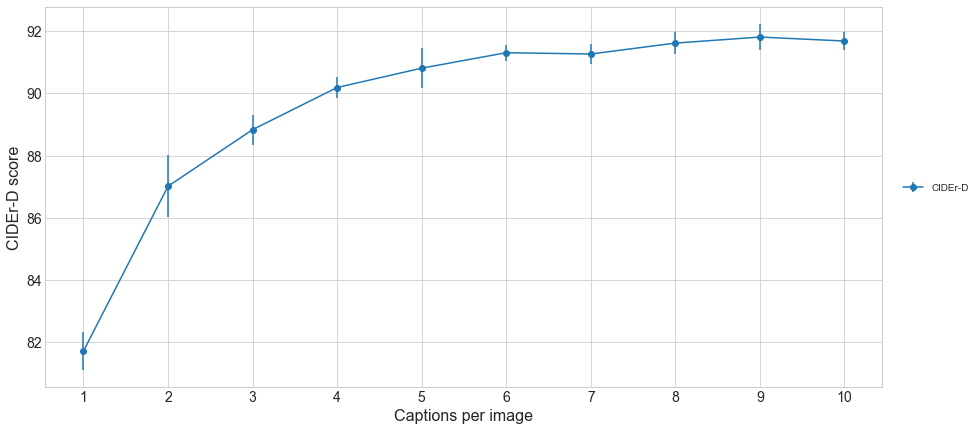

In [37]:
# plot c1-10
plt.figure(figsize=(15,7))
line7 = plt.errorbar(x, a_c_c1_10[0]*100, a_c_c1_10[1]*100, fmt='-o', label='CIDEr-D')
#plt.legend([line1, line2, line3, line4, line5, line6, line7, line8], METRICS)
plt.legend(bbox_to_anchor=(1.02, 0.5, 1., .1), loc='lower left',
           ncol=1, borderaxespad=0.)
plt.ylabel('CIDEr-D score', Fontsize=16)
plt.xlabel('Captions per image', Fontsize=16)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], Fontsize=14)
plt.yticks(Fontsize=14)
plt.savefig(save_path.joinpath('a-cider-c1-10.pdf'))
plt.show()

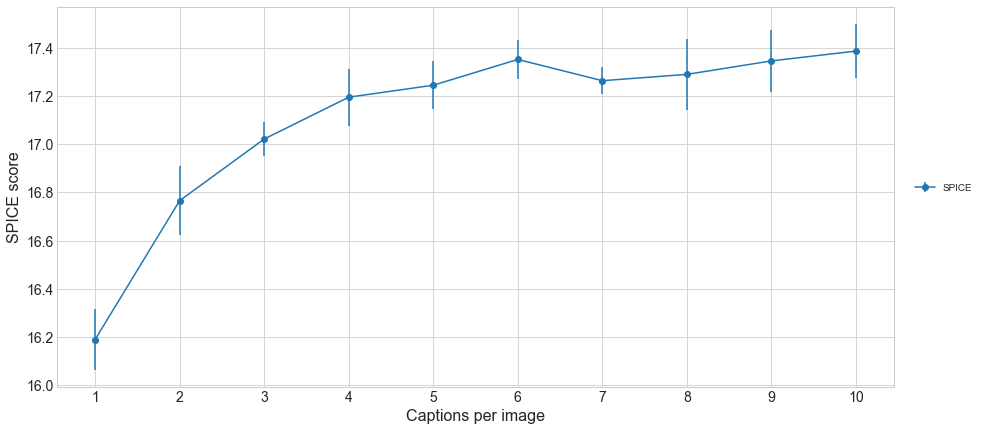

In [44]:
# plot c1-10
plt.figure(figsize=(15,7))
line7 = plt.errorbar(x, a_s_c1_10[0]*100, a_s_c1_10[1]*100, fmt='-o', label='SPICE')
#plt.legend([line1, line2, line3, line4, line5, line6, line7, line8], METRICS)
plt.legend(bbox_to_anchor=(1.02, 0.5, 1., .1), loc='lower left',
           ncol=1, borderaxespad=0.)
plt.ylabel('SPICE score', Fontsize=16)
plt.xlabel('Captions per image', Fontsize=16)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], Fontsize=14)
plt.yticks(Fontsize=14)
plt.savefig(save_path.joinpath('a-spice-c1-10.pdf'))
plt.show()